In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from pylab import plot, show, text
import datetime
import matplotlib.dates as mdates
import pylab

# Part 1

In [21]:
df_logins = pd.read_json('logins.json')

In [22]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [31]:
df_logins = pd.read_json('logins.json')
df_logins.index = pd.to_datetime(df_logins.login_time, unit='m')
df_freq = df_logins.groupby(pd.Grouper(freq='15Min')).agg(['count']).rename(columns=dict(count='counts'))
df_freq.columns = df_freq.columns.droplevel(0)
df_freq = df_freq.reset_index(drop=False)

In [32]:
df1=df_freq.copy()

In [34]:
df_freq = df_freq.set_index('login_time')


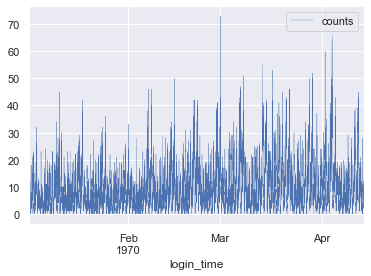

In [35]:
df_freq.plot(linewidth=0.3)

In [33]:
df1['login_time']

0      1970-01-01 20:00:00
1      1970-01-01 20:15:00
2      1970-01-01 20:30:00
3      1970-01-01 20:45:00
4      1970-01-01 21:00:00
               ...        
9783   1970-04-13 17:45:00
9784   1970-04-13 18:00:00
9785   1970-04-13 18:15:00
9786   1970-04-13 18:30:00
9787   1970-04-13 18:45:00
Name: login_time, Length: 9788, dtype: datetime64[ns]

In [36]:
df1['login_time'] = pd.Series([val.time() for val in df1['login_time']])

In [37]:
df1['login_time']

0       20:00:00
1       20:15:00
2       20:30:00
3       20:45:00
4       21:00:00
          ...   
9783    17:45:00
9784    18:00:00
9785    18:15:00
9786    18:30:00
9787    18:45:00
Name: login_time, Length: 9788, dtype: object

In [38]:
df1 = df1.set_index('login_time')

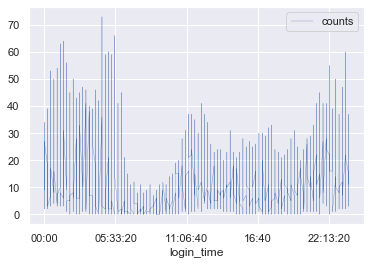

In [39]:
df1.plot(linewidth=0.3)

# Here you can see that there were high visits to the website in begining march and april.
# Also we can see users usually login between 11 pm to 5 am.

# Part 2

a. how you will implement the experiment

Measure the gross income of taxi and logistics transportation companies for both cities before and after implementing reimbursement of toll costs

b. what statistical test(s) you will conduct to verify the significance of the observation

To test the effectiveness of free toll fee, use t-test for paired observations.

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

The null hypothesis is the gross income of taxi and transportation companies for Gotham city is the same for free toll and for non-free toll costs The alternative hypothes is the gross income of taxi and transportation companies for Gotham city with free toll is greater than for non-free toll costs

In [42]:
import json
#read and load json file
with open('ultimate_data_challenge.json') as f:
    data = json.load(f) 
#convert to dataframe
df_usage = pd.DataFrame(data)
df_backup = pd.DataFrame(data)


#convert string to datetime
df_usage['last_trip_date'] = pd.to_datetime(df_usage['last_trip_date'])
df_usage['signup_date']    = pd.to_datetime(df_usage['signup_date'])

#calculate number of days that user is active
df_usage['num_of_days_active'] = df_usage['last_trip_date'] - df_usage['signup_date'] 

#assign 1 if active, 0 if not active for past
df_usage['active_user'] = df_usage['num_of_days_active'].apply(lambda x: int(x >= pd.Timedelta('150 days')))

#assign 1 if iPhone, 0 if not
df_usage['phone'] = df_usage['phone'].apply(lambda x: int(x == 'iPhone'))

#assign 1 if True, 0 if False
df_usage['ultimate_black_user'] = df_usage['ultimate_black_user'].apply(lambda x: int(x == True))


df_usage=df_usage.dropna(0)

In [43]:
df_usage.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,num_of_days_active,active_user
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744,41744.000000
mean,2.611393,4.601801,1.073697,0.703143,8.884695,0.385612,61.304437,5.465312,4.776648,98 days 01:11:01.632809,0.282460
std,4.060121,0.616079,0.198681,0.456878,18.309042,0.486745,34.799944,5.149810,0.404109,61 days 05:30:51.610445,0.450201
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00,0.000000
25%,0.000000,4.300000,1.000000,0.000000,0.000000,0.000000,37.500000,2.420000,4.700000,38 days 00:00:00,0.000000
50%,1.000000,4.900000,1.000000,1.000000,0.000000,0.000000,66.700000,3.790000,5.000000,118 days 00:00:00,0.000000
75%,3.000000,5.000000,1.070000,1.000000,11.100000,1.000000,100.000000,6.490000,5.000000,152 days 00:00:00,1.000000
max,125.000000,5.000000,8.000000,1.000000,100.000000,1.000000,100.000000,79.690000,5.000000,181 days 00:00:00,1.000000


# Part 3

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

About 83% of the dataset were retained after removing records with NaN value.
Data cleaning: I would check if all columns have values within the specified range.
Data formatting: Convert date strings format into datetime
EDA: Mostly bar chart for the ratings and averages and pie charts for categorical data like phone and cities

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

I used LogisticRegression for algorithm since it is categorizing the users into Active (1) or inactive (0). I used accuracy score function from sklearn.
Alternative models instead of logistics regression: Random forest and gradient boosting machine (gbm)

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Recommendations:

1. it shows that iPhone users are more active than android users so they should spend more on iphone users
2. Focus on retaining the customer for the first 30 days.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#construct the dataset X, y
X = df_usage[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 
'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]
y = (df_usage.active_user == 1)

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values, test_size=0.20, random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print("Accuracy score: ", accuracy_score(clf.predict(Xtestlr), ytestlr))

# Print importance of each features
clf.fit(Xlr / np.std(Xlr, 0), ylr)
print("Regression coefficients: ", clf.coef_)
print("Column names: ", (X.columns.values))

Accuracy score:  0.728829799976045
Regression coefficients:  [[-0.19257451 -0.04507601  0.00301157 -0.05549293  0.44953598  0.11112835
   0.3609592   0.34239547  0.00328261]]
Column names:  ['avg_dist' 'avg_rating_by_driver' 'avg_rating_of_driver' 'avg_surge'
 'phone' 'surge_pct' 'trips_in_first_30_days' 'ultimate_black_user'
 'weekday_pct']


C:\Users\shataria\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
